In [ ]:
import pandas as pd
df = pd.read_excel('DTI_Project_new.xlsx')
print(df.head())

   LATITUDE  LONGITUDE DESTINATION       USERNAME      SOURCEHOST  \
0  47.91542 -120.60306  samplehost       fakeuser    24.16.97.222   
1  52.37022    4.89517  samplehost        CSNYDER   89.248.165.74   
2  40.71455  -74.00714  samplehost  ADMINISTRATOR   72.45.247.218   
3  33.99762   -6.84737  samplehost      AZUREUSER  102.50.242.216   
4  -5.32558  100.28595  samplehost           Test      42.1.62.34   

                STATE        COUNTRY          LABEL   LABEL ADDRESS  \
0          Washington  United States  United States    24.16.97.222   
1       North Holland    Netherlands    Netherlands   89.248.165.74   
2            New York  United States  United States   72.45.247.218   
3  Rabat-Salé-Kénitra        Morocco        Morocco  102.50.242.216   
4              Penang       Malaysia       Malaysia      42.1.62.34   

            TIMESTAMP  
0 2021-10-26 03:28:29  
1 2021-10-26 06:12:56  
2 2021-10-26 10:44:07  
3 2021-10-26 11:03:13  
4 2021-10-26 11:04:45  


In [ ]:

print(df.isnull().sum())

LATITUDE         0
LONGITUDE        0
DESTINATION      0
USERNAME         0
SOURCEHOST       0
STATE            2
COUNTRY          0
LABEL            0
LABEL ADDRESS    0
TIMESTAMP        0
dtype: int64


Here, We get know that our data has null values in column "State"

In [ ]:
import numpy as np


In [ ]:
df_cleaned = df.dropna(subset=['STATE'])

print(df)

Now, we are heading toward data visualization.

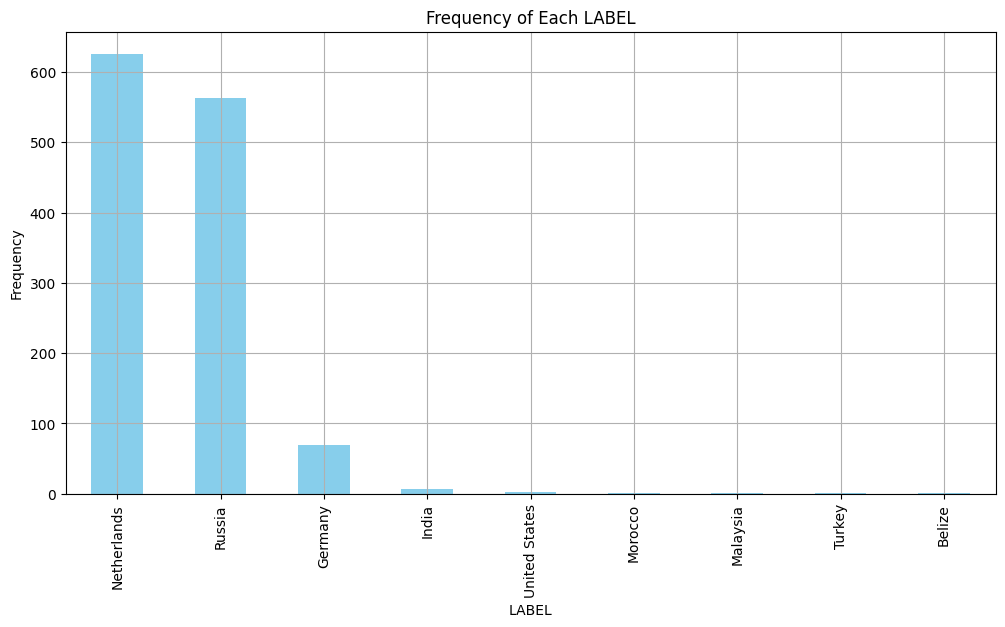

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('DTI_Project_new.xlsx')

data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])

plt.figure(figsize=(12, 6))
data['LABEL'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency of Each LABEL')
plt.xlabel('LABEL')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
import plotly.express as px
top_countries = df['COUNTRY'].value_counts().head(10)

fig = px.treemap(names=top_countries.index, parents=["" for _ in top_countries.index], values=top_countries.values)

fig.update_layout(

    title='Top Countries with Highest Number of Attackers',
)
fig.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
top_n = 10  # Number of top users to display

# Get the top N users based on counts
top_users = df['USERNAME'].value_counts().head(top_n)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_users.index, y=top_users.values, palette='viridis')
plt.title(f'Top {top_n} Users by Count')
plt.xlabel('Usernames')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


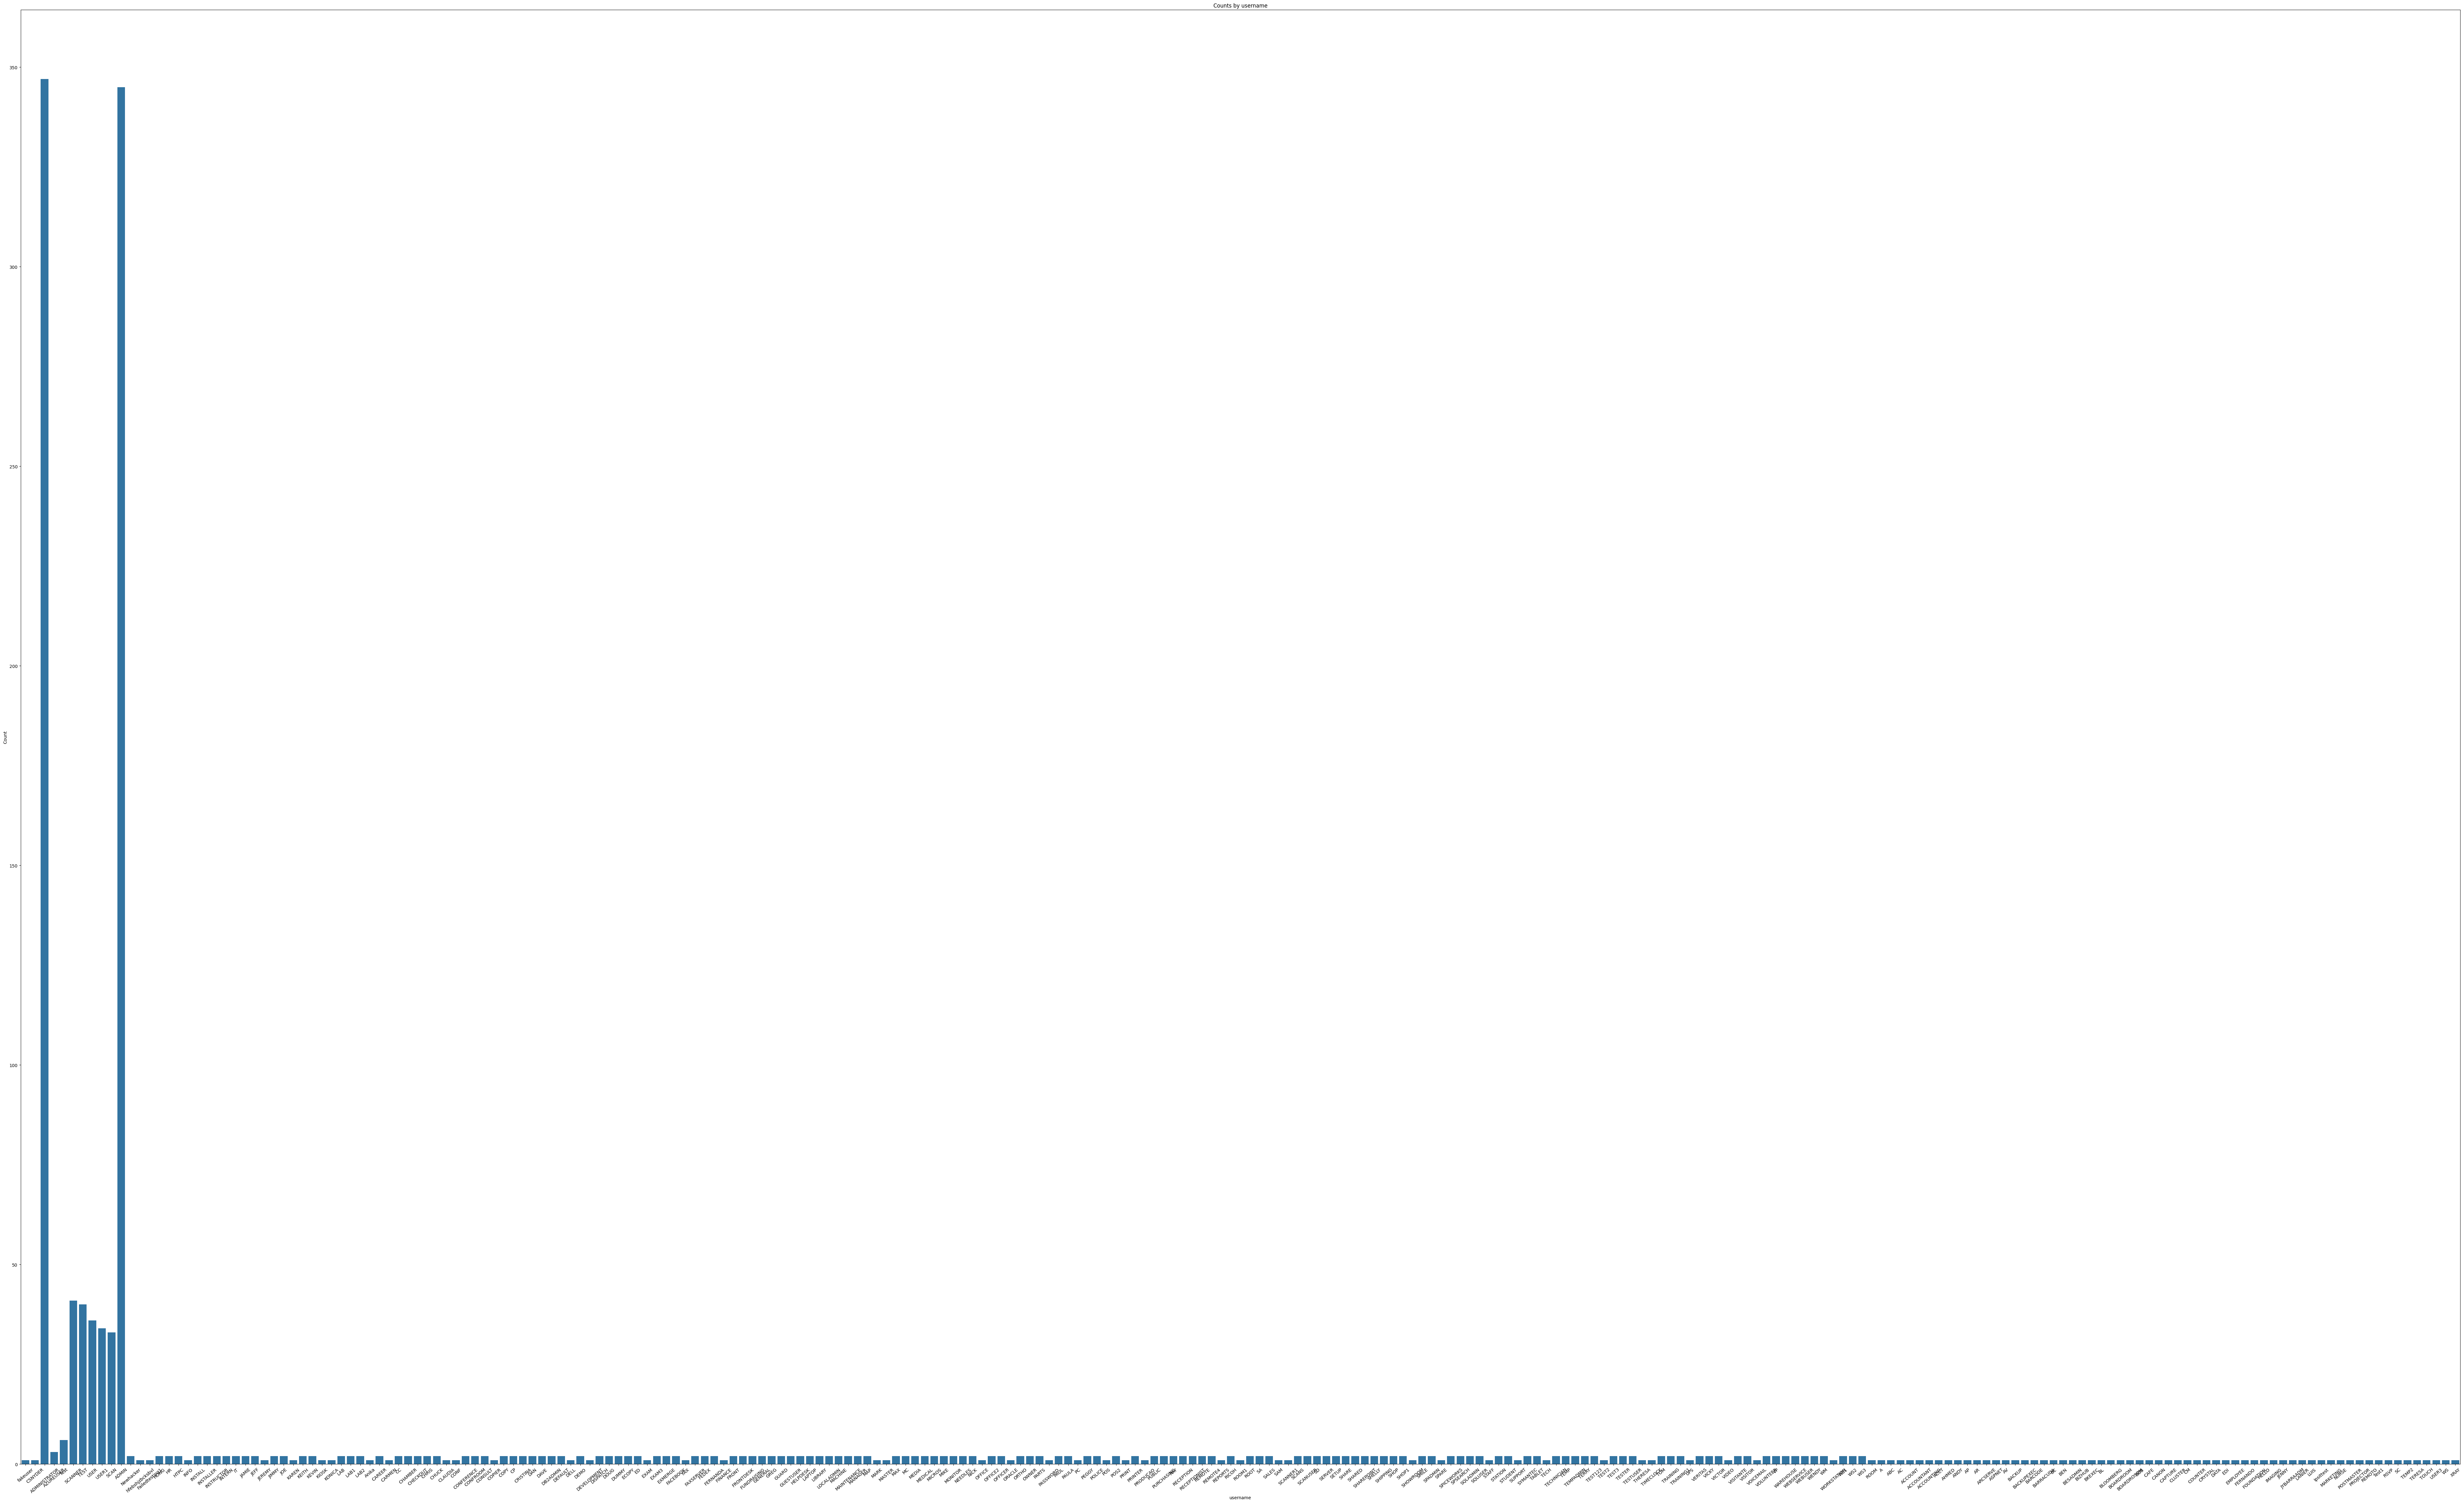

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(100, 60))
sns.countplot(x='USERNAME', data=df)
plt.title('Counts by username')
plt.xlabel('username')
plt.ylabel('Count')
plt.xticks(rotation=40)
plt.show()

<ipython-input-9-8827d04bf8ca>:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


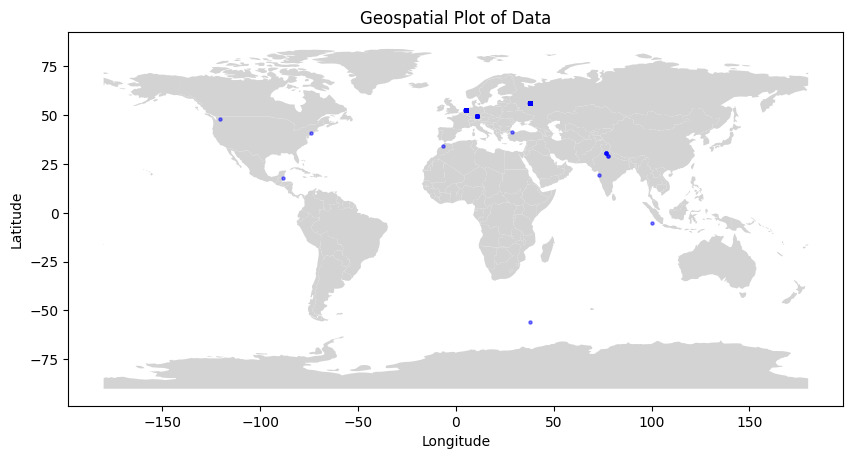

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgray')
geo_df.plot(ax=ax, markersize=5, color='blue', alpha=0.5)
plt.title('Geospatial Plot of Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
country_counts = df['COUNTRY'].value_counts()

data = pd.DataFrame({'Country': country_counts.index, 'Count': country_counts.values})

fig = px.choropleth(data_frame=data, locations='Country', locationmode='country names',
                    color='Count', title='Number of Attacks Released By Country',
                    color_continuous_scale='Reds', range_color=(0, data['Count'].max()),
                    labels={'Count': 'Number of Attackers'})

fig.update_layout(

)
fig.show()


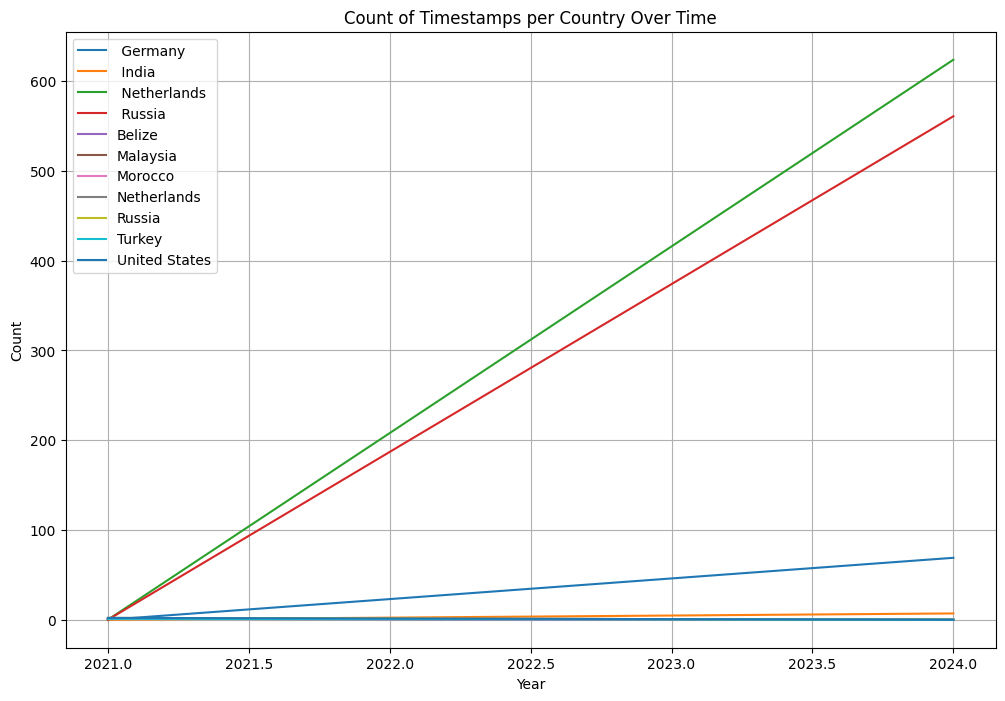

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('DTI_Project_new.xlsx')

data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])

data['YEAR'] = data['TIMESTAMP'].dt.year

timestamps_per_country_year = data.groupby(['COUNTRY', 'YEAR']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
for country in timestamps_per_country_year.index:
    plt.plot(timestamps_per_country_year.columns, timestamps_per_country_year.loc[country], label=country)

plt.title('Count of Timestamps per Country Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


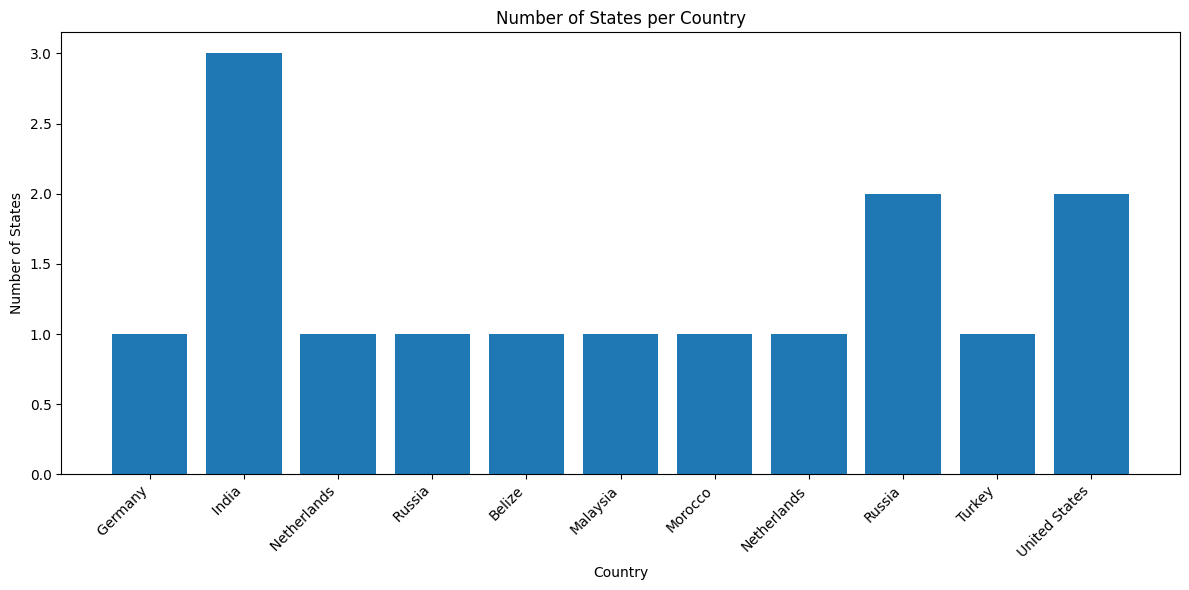

In [ ]:
country_state_counts = df.groupby('COUNTRY')['STATE'].nunique().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(country_state_counts['COUNTRY'], country_state_counts['STATE'])
plt.xlabel('Country')
plt.ylabel('Number of States')
plt.title('Number of States per Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Here, we get an insight that India, Russia, US have frequency of more than one state.


Now trying to count the occurance of a user

In [ ]:
country_username_counts = df.groupby(['COUNTRY', 'USERNAME']).size().reset_index(name='COUNT')
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
country_username_counts.pivot(index='COUNTRY', columns='USERNAME', values='COUNT').plot(kind='bar', stacked=True)
plt.xlabel('Country')
plt.ylabel('Count of Usernames')
plt.title('Count of Usernames per Country')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Username', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

data = pd.read_excel('DTI_Project_new.xlsx')

username_counts = data['USERNAME'].value_counts()

print("Username Counts:")
print(username_counts)


Username Counts:
USERNAME
ADMINISTRATOR    347
ADMIN            345
SCANNER           41
TEST              40
USER              36
                ... 
SHOWROOM           1
SCANNER1           1
SAM                1
CSNYDER            1
XRAY               1
Name: count, Length: 255, dtype: int64


**Here we get the count of each username**


In [ ]:
import pandas as pd

data = pd.read_excel('DTI_Project_new.xlsx')

username_counts = data['USERNAME'].value_counts()

print("Username Counts:")
print(username_counts)

min_count = username_counts.min()
max_count = username_counts.max()
mean_count = username_counts.mean()

print("\nMinimum Count:", min_count)
print("Maximum Count:", max_count)
print("Mean Count:", mean_count)


Username Counts:
USERNAME
ADMINISTRATOR    347
ADMIN            345
SCANNER           41
TEST              40
USER              36
                ... 
SHOWROOM           1
SCANNER1           1
SAM                1
CSNYDER            1
XRAY               1
Name: count, Length: 255, dtype: int64

Minimum Count: 1
Maximum Count: 347
Mean Count: 4.984313725490196


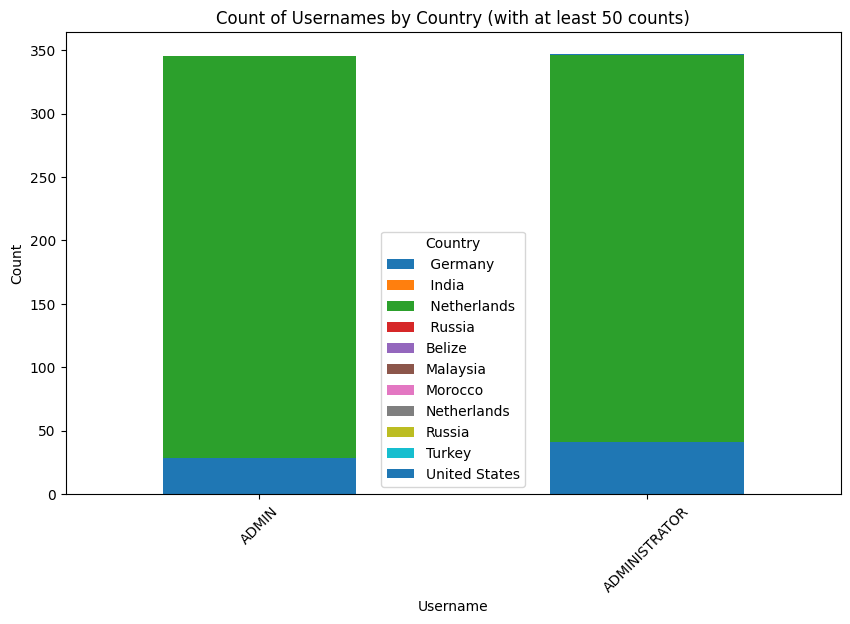

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('DTI_Project_new.xlsx')

username_counts = data.groupby(['USERNAME', 'COUNTRY']).size().unstack(fill_value=0)

username_counts_filtered = username_counts[username_counts.sum(axis=1) >= 50]

username_counts_filtered.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Usernames by Country (with at least 50 counts)')
plt.xlabel('Username')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.show()


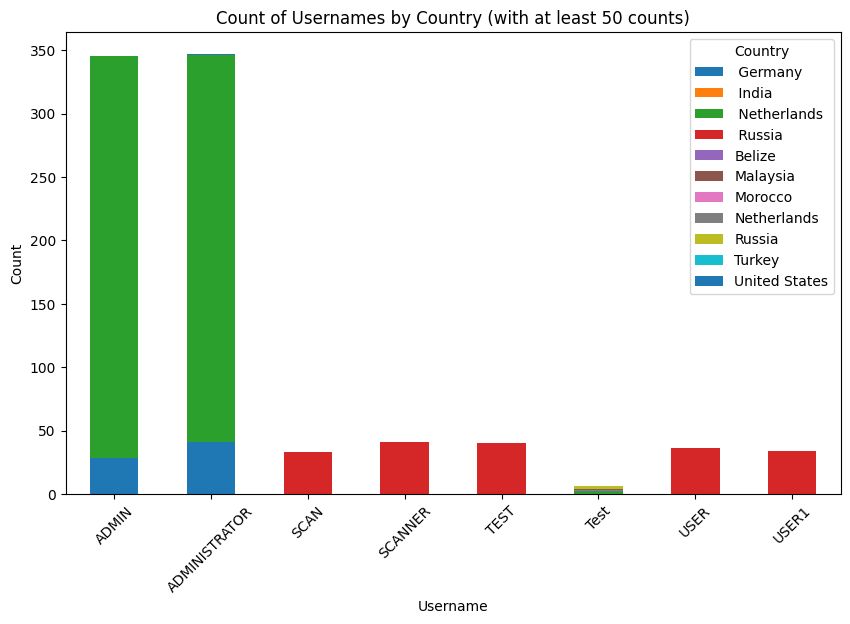

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('DTI_Project_new.xlsx')

username_counts = data.groupby(['USERNAME', 'COUNTRY']).size().unstack(fill_value=0)

username_counts_filtered = username_counts[username_counts.sum(axis=1) >= 5]

username_counts_filtered.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Usernames by Country (with at least 10 counts)')
plt.xlabel('Username')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.show()


**ANALOMY DETECTION**

In [ ]:
import pandas as pd

data = pd.read_excel('DTI_Project_new.xlsx')
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])

time_window = pd.Timedelta(minutes=5)

user_counts = data.groupby('USERNAME').apply(lambda group: group.set_index('TIMESTAMP').resample(time_window).size())

anomalies = user_counts[user_counts > 5]

anomalies_df = anomalies.reset_index()
anomalies_df.columns = ['USERNAME', 'TIMESTAMP', 'OCCURRENCES']

print("Anomalies (Occurrences > 5 within a 5-minute window):")
print(anomalies_df)


Anomalies (Occurrences > 5 within a 5-minute window):
         USERNAME           TIMESTAMP  OCCURRENCES
0           ADMIN 2024-03-18 09:35:00            9
1           ADMIN 2024-03-18 09:40:00           19
2           ADMIN 2024-03-18 11:10:00           19
3           ADMIN 2024-03-18 11:35:00           38
4           ADMIN 2024-03-18 11:40:00           53
5           ADMIN 2024-03-18 11:45:00           51
6           ADMIN 2024-03-18 11:50:00           45
7           ADMIN 2024-03-18 11:55:00           30
8           ADMIN 2024-03-18 12:00:00           27
9           ADMIN 2024-03-18 12:05:00           34
10          ADMIN 2024-03-18 12:10:00           17
11  ADMINISTRATOR 2024-03-18 09:35:00           16
12  ADMINISTRATOR 2024-03-18 09:40:00           25
13  ADMINISTRATOR 2024-03-18 11:10:00           21
14  ADMINISTRATOR 2024-03-18 11:35:00           37
15  ADMINISTRATOR 2024-03-18 11:40:00           51
16  ADMINISTRATOR 2024-03-18 11:45:00           50
17  ADMINISTRATOR 2024-03-18

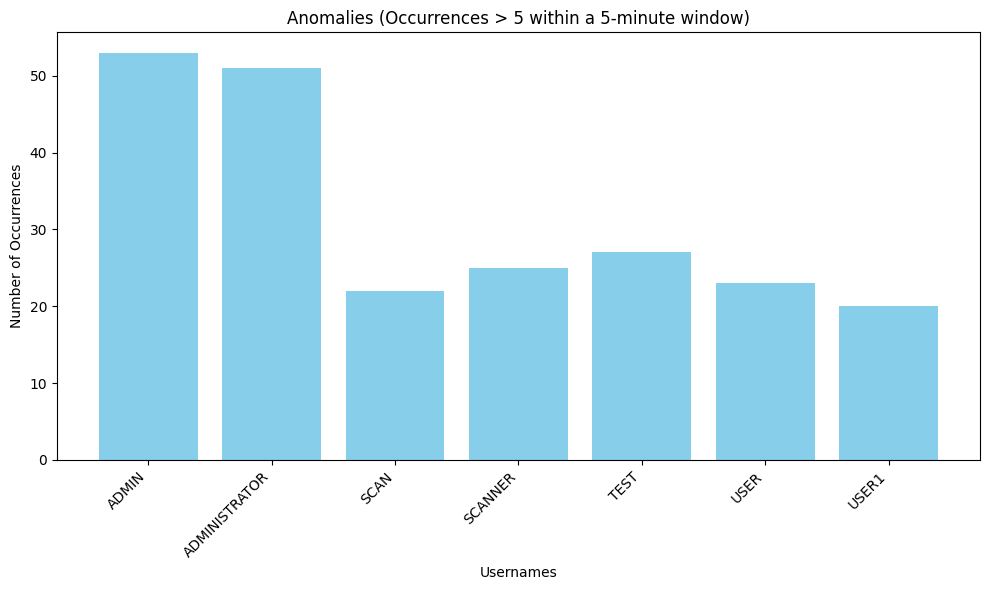

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(anomalies_df['USERNAME'], anomalies_df['OCCURRENCES'], color='skyblue')
plt.xlabel('Usernames')
plt.ylabel('Number of Occurrences')
plt.title('Anomalies (Occurrences > 5 within a 5-minute window)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

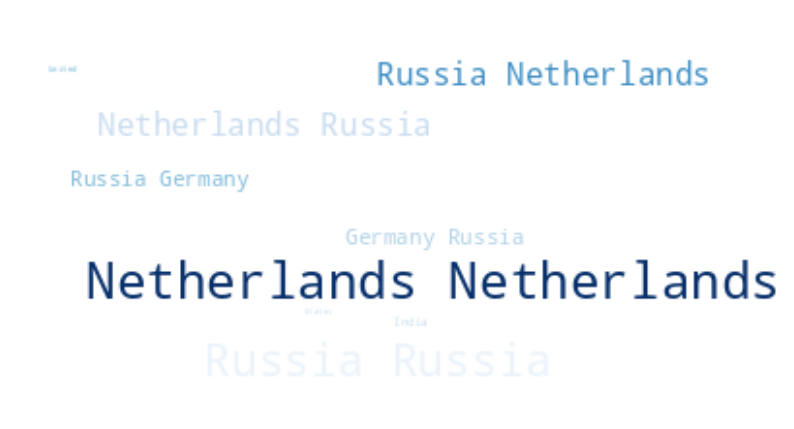

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
titles = df['COUNTRY'].values

text = ' '.join(titles)

wordcloud = WordCloud(background_color='white', colormap='Blues').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common usernames ', color='white')
plt.show()

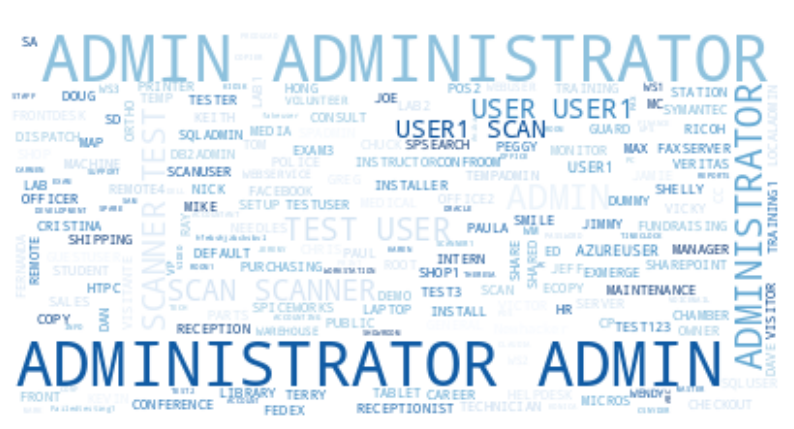

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
titles = df['USERNAME'].values

text = ' '.join(titles)

wordcloud = WordCloud(background_color='white', colormap='Blues').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common usernames ', color='white')
plt.show()